## 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -qq /content/drive/MyDrive/PerfectGuide_ML/dataset/train.csv.zip

In [4]:
cust_df = pd.read_csv('/content/train.csv')
print('dataset shape :', cust_df.shape)
cust_df.head()

dataset shape : (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [6]:
# 0 = Satisfied, 1 = Unsatisfied
print(cust_df['TARGET'].value_counts())

unsatisfied_count = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()
total_count = cust_df['TARGET'].count()

print('unsatisfied 비율은 : {0:.2f}'.format((unsatisfied_count / total_count)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 : 0.04


In [7]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182

In [8]:
print('< var3 변수 top 10 > \n\n',cust_df['var3'].value_counts()[:10])

< var3 변수 top 10 > 

  2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [9]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-9999999, 2, inplace = True)
cust_df.drop('ID', axis = 1, inplace= True)

# 피처 세트와 레이블 세트 분리하기
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape : {0}'.format(X_features.shape))

피처 데이터 shape : (76020, 369)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size = 0.2, random_state = 0)

train_count = y_train.count()
test_count = y_test.count()
print('학습 세트 Shape : {0}, 테스트 세트 Shape{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts() / train_count)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts() / test_count)

학습 세트 Shape : (60816, 369), 테스트 세트 Shape(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random_state는 예제 수행시 마다 도일 예측 결과를 위해 설정.
xgb_clf = XGBClassifier(n_estimators= 500, random_state= 156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train,
            early_stopping_rounds = 100, eval_metric = 'auc',
            eval_set = [(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

In [12]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators= 100)

params = {'max_depth' : [5, 7], 'min_child_weight' : [1, 3], 'colsample_bytree' : [0.5, 0.75]}

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv를 지정하지 않음
gridcv = GridSearchCV(xgb_clf, param_grid = params)
gridcv.fit(X_train, y_train,
           early_stopping_rounds = 30, eval_metric = 'auc',
           eval_set = [(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.716371	validation_1-auc:0.721224
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.808233	validation_1-auc:0.811497
[2]	validation_0-auc:0.804883	validation_1-auc:0.804536
[3]	validation_0-auc:0.815261	validation_1-auc:0.81637
[4]	validation_0-auc:0.825247	validation_1-auc:0.824507
[5]	validation_0-auc:0.819668	validation_1-auc:0.820074
[6]	validation_0-auc:0.818989	validation_1-auc:0.819519
[7]	validation_0-auc:0.824907	validation_1-auc:0.825344
[8]	validation_0-auc:0.828985	validation_1-auc:0.828536
[9]	validation_0-auc:0.827021	validation_1-auc:0.825688
[10]	validation_0-auc:0.83165	validation_1-auc:0.828585
[11]	validation_0-auc:0.834058	validation_1-auc:0.831318
[12]	validation_0-auc:0.836334	validation_1-auc:0.832347
[13]	validation_0-auc:0.835441	validation_1-auc:0.831432
[14]	validation_0-auc:0.834861	validation_1-auc:0.830882


In [14]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.822918	validation_1-auc:0.815289
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.8269	validation_1-auc:0.81662
[2]	validation_0-auc:0.831833	validation_1-auc:0.820425
[3]	validation_0-auc:0.835682	validation_1-auc:0.82505
[4]	validation_0-auc:0.838007	validation_1-auc:0.826108
[5]	validation_0-auc:0.837772	validation_1-auc:0.827311
[6]	validation_0-auc:0.837942	validation_1-auc:0.826909
[7]	validation_0-auc:0.838344	validation_1-auc:0.827175
[8]	validation_0-auc:0.839621	validation_1-auc:0.828217
[9]	validation_0-auc:0.839657	validation_1-auc:0.827852
[10]	validation_0-auc:0.841509	validation_1-auc:0.829012
[11]	validation_0-auc:0.84092	validation_1-auc:0.828037
[12]	validation_0-auc:0.841022	validation_1-auc:0.828533
[13]	validation_0-auc:0.841312	validation_1-auc:0.828333
[14]	validation_0-auc:0.845194	validation_1-auc:0.834113
[1

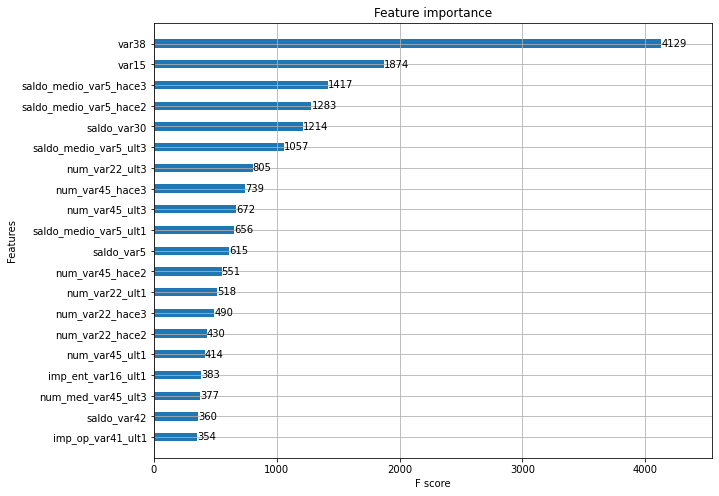

In [17]:
from xgboost import plot_importance
fig, ax = plt.subplots(1, 1, figsize = (10,8))
plot_importance(xgb_clf, ax = ax, max_num_features=20, height=0.4)

## LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [19]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train,
             early_stopping_rounds = 100, eval_metric = 'auc', 
             eval_set = evals, verbose = True)

lgbm_roc_score = roc_auc_score(y_test,
                               lgbm_clf.predict_proba(X_test)[:,1],
                               average = 'macro')

print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's binary_logloss: 0.165046	valid_0's auc: 0.817384
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.16	valid_0's auc: 0.81863
[3]	valid_0's binary_logloss: 0.15628	valid_0's auc: 0.827229
[4]	valid_0's binary_logloss: 0.153407	valid_0's auc: 0.832107
[5]	valid_0's binary_logloss: 0.151198	valid_0's auc: 0.834741
[6]	valid_0's binary_logloss: 0.149292	valid_0's auc: 0.83469
[7]	valid_0's binary_logloss: 0.147809	valid_0's auc: 0.835979
[8]	valid_0's binary_logloss: 0.146438	valid_0's auc: 0.837682
[9]	valid_0's binary_logloss: 0.145448	valid_0's auc: 0.838193
[10]	valid_0's binary_logloss: 0.144653	valid_0's auc: 0.838599
[11]	valid_0's binary_logloss: 0.143949	valid_0's auc: 0.838227
[12]	valid_0's binary_logloss: 0.143381	valid_0's auc: 0.837881
[13]	valid_0's binary_logloss: 0.142806	valid_0's auc: 0.838123
[14]	valid_0's binary_logloss: 0.142267	valid_0's auc: 0.838551
[15]	valid_0's binary_logloss: 0.14188	valid_0's auc: 0.8

In [20]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소

LGBM_clf = LGBMClassifier(n_estimatiors = 200)

params = {'num_leaves': [32, 64],
          'max_depth': [128, 160],
          'min_child_samples': [60, 100],
          'subsample': [0.8, 1]}

gridcv = GridSearchCV(lgbm_clf, param_grid = params)
gridcv.fit(X_train, y_train,
           early_stopping_rounds = 30, eval_metric = 'auc',
           eval_set = [(X_train, y_train), (X_test, y_test)])

print('GridSerchCV 최적 파라미터 : ', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test,
                               gridcv.predict_proba(X_test)[:,1],
                               average = 'macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's binary_logloss: 0.156198	valid_0's auc: 0.823664	valid_1's binary_logloss: 0.16488	valid_1's auc: 0.821078
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's binary_logloss: 0.15092	valid_0's auc: 0.82965	valid_1's binary_logloss: 0.15978	valid_1's auc: 0.824865
[3]	valid_0's binary_logloss: 0.147151	valid_0's auc: 0.835112	valid_1's binary_logloss: 0.156174	valid_1's auc: 0.826157
[4]	valid_0's binary_logloss: 0.14422	valid_0's auc: 0.839678	valid_1's binary_logloss: 0.153395	valid_1's auc: 0.830489
[5]	valid_0's binary_logloss: 0.141762	valid_0's auc: 0.842477	valid_1's binary_logloss: 0.151083	valid_1's auc: 0.832915
[6]	valid_0's binary_logloss: 0.139668	valid_0's auc: 0.845763	valid_1's binary_logloss: 0.149317	valid_1's auc: 0.835313
[7]	valid_0's binary_logloss: 0.137997	valid_0's auc: 0.846352	valid_1's binary_logloss: 0.14773	valid_1's auc: 0.835977
[8]	valid_0's binary_logloss: 0.13653	valid_0's auc: 0.849153	valid_1's binary_logloss: 0.

In [21]:
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 32
                          ,sumbsample = 0.8, min_child_samples = 100,
                          max_depth = 128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train,
             early_stopping_rounds = 100, eval_metric = 'auc',
             eval_set = evals, verbose = True)

print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's binary_logloss: 0.165016	valid_0's auc: 0.819488
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.159711	valid_0's auc: 0.822387
[3]	valid_0's binary_logloss: 0.156068	valid_0's auc: 0.829542
[4]	valid_0's binary_logloss: 0.153141	valid_0's auc: 0.834917
[5]	valid_0's binary_logloss: 0.150804	valid_0's auc: 0.837871
[6]	valid_0's binary_logloss: 0.148876	valid_0's auc: 0.839548
[7]	valid_0's binary_logloss: 0.147225	valid_0's auc: 0.841812
[8]	valid_0's binary_logloss: 0.14594	valid_0's auc: 0.842382
[9]	valid_0's binary_logloss: 0.144866	valid_0's auc: 0.842811
[10]	valid_0's binary_logloss: 0.143872	valid_0's auc: 0.843186
[11]	valid_0's binary_logloss: 0.14305	valid_0's auc: 0.843465
[12]	valid_0's binary_logloss: 0.142376	valid_0's auc: 0.843222
[13]	valid_0's binary_logloss: 0.141783	valid_0's auc: 0.843564
[14]	valid_0's binary_logloss: 0.141419	valid_0's auc: 0.843389
[15]	valid_0's binary_logloss: 0.141	valid_0's auc: 

### BaysianOptimization을 이용한 하이퍼 파라미터 튜닝
하이퍼 파라미터 튜닝 대상을 Dictionary 형태로 정의합니다. 이때 개별 하이퍼 파라미터는 튜플형태의 범위값으로 주어집니다.

예를 들어 num_leaves의 값을 24~45 사이의 값을 입력하려면 'num_leaves':(24, 45)로 부여해야 합니다.

이 때 유의해야 할 사항은 num_leaves는 정수형값만 가능한 하이퍼 파라미터임에도 불구하고 BaysianOptimization 클래스가 해당 파라미터의 범위값을 입력 받으면 이를 무조건 정수형이 아닌 실수형 값으로 인식하여 값을 추출하는 것입니다. 즉 24.5, 25.4, 30.2, 27.2 와 같이 실수형 값을 num_leaves 값으로 설정하려고 시도하는데, 이는 실행 오류를 발생 시킵니다.

이러한 실행 오류를 막기 위해서는 호출되는 BayesianOptimization 평가 함수내에서 XGBoost/LightGBM의 하이퍼 파라미터를 다시 정수형 값으로 변경하면 됩니다. 

In [22]:
bayes_params = {
    'num_leaves': (24, 45),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (4, 12),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

테스트 해볼 하이퍼 파라미터의 범위 값을 설정하였으면 BaysianOptimization에서 호출하여 모델을 최적화하는 함수를 만들어 보겠습니다.

해당 함수는 BaysianOptimization에서 하이퍼 파라미터를 튜닝하기 위해 호출되면 제대로 튜닝이 되고 있는지를 판단하기 위해서 모델을 학습/평가하고 이에 따른 평가 지표를 반환하는 형식으로 만들어집니다. 이 평가 함수는 BayesianOptimization 객체에서 파라미터를 변경하면서 호출되므로 함수의 인자로 앞에서 딕셔너리로 설정된 파라미터들을 가지게 됩니다.

In [23]:
def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="auc", verbose=100 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    valid_proba = lgb_model.predict_proba(X_test, num_iteration=best_iter)[:, 1]
    roc_preds = roc_auc_score(y_test, valid_proba)
    print('roc_auc:', roc_preds)
    return roc_preds

In [34]:
# BayesianOptimization 객체를 생성합니다. 이때 생성 인자로 앞에서 만든 평가함수 lgb_roc_eval 함수와 튜닝할 하이퍼 파라미터의 범위값을 설정한 딕셔너리 변수인 bayes_params를 입력합니다.
from bayes_opt import BayesianOptimization
BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params, random_state = 0)

In [35]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 33, 'colsample_bytree': 0.7744067519636624, 'subsample': 0.9458865003910399, 'max_depth': 10, 'reg_alpha': 0.32294705653332806, 'reg_lambda': 0.21879360563134626, 'min_split_gain': 0.05494343511669279, 'min_child_weight': 32.12435192322397, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds.
[100]	valid_0's binary_logloss: 0.14054	valid_0's auc: 0.84176
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.14054	valid_0's auc: 0.84176
best_iter: 100
roc_auc: 0.8417601635961712
|  1        |  0.8418   |  0.7744   |  9.722    |  32.12    |  0.05494  |  32.9     |  0.3229   |  0.2188   |  0.9459   |
params: {'n_estimator': 200, 'l

In [36]:
BO_lgb.res

[{'params': {'colsample_bytree': 0.7744067519636624,
   'max_depth': 9.721514930979357,
   'min_child_weight': 32.12435192322397,
   'min_split_gain': 0.05494343511669279,
   'num_leaves': 32.896750786116996,
   'reg_alpha': 0.32294705653332806,
   'reg_lambda': 0.21879360563134626,
   'subsample': 0.9458865003910399},
  'target': 0.8417601635961712},
 {'params': {'colsample_bytree': 0.9818313802505146,
   'max_depth': 7.067532150606222,
   'min_child_weight': 40.627626713719906,
   'min_split_gain': 0.05336059705553755,
   'num_leaves': 35.92893578297258,
   'reg_alpha': 0.4627983191463305,
   'reg_lambda': 0.03551802909894347,
   'subsample': 0.5435646498507704},
  'target': 0.8385323544121819},
 {'params': {'colsample_bytree': 0.5101091987201629,
   'max_depth': 10.660958764383505,
   'min_child_weight': 40.01705379274327,
   'min_split_gain': 0.08713120267643511,
   'num_leaves': 44.55098518688804,
   'reg_alpha': 0.3995792821083618,
   'reg_lambda': 0.23073968112646592,
   'subsam

In [37]:
BO_lgb.max

{'params': {'colsample_bytree': 0.7200951754925996,
  'max_depth': 11.654234927004241,
  'min_child_weight': 5.196613611741998,
  'min_split_gain': 0.03744495927092006,
  'num_leaves': 44.018641993920255,
  'reg_alpha': 0.10503531416790524,
  'reg_lambda': 0.35964532411635874,
  'subsample': 0.8993149013622737},
 'target': 0.8461713169751597}

In [38]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lgbm_clf = LGBMClassifier(n_estimators=1000, learning_rate=0.02, **max_params)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's binary_logloss: 0.172369	valid_0's auc: 0.770628
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.17159	valid_0's auc: 0.774772
[3]	valid_0's binary_logloss: 0.169938	valid_0's auc: 0.819101
[4]	valid_0's binary_logloss: 0.168425	valid_0's auc: 0.828726
[5]	valid_0's binary_logloss: 0.167597	valid_0's auc: 0.825716
[6]	valid_0's binary_logloss: 0.166333	valid_0's auc: 0.831798
[7]	valid_0's binary_logloss: 0.165104	valid_0's auc: 0.83558
[8]	valid_0's binary_logloss: 0.163979	valid_0's auc: 0.837238
[9]	valid_0's binary_logloss: 0.162924	valid_0's auc: 0.839128
[10]	valid_0's binary_logloss: 0.161919	valid_0's auc: 0.839996
[11]	valid_0's binary_logloss: 0.161339	valid_0's auc: 0.839348
[12]	valid_0's binary_logloss: 0.160458	valid_0's auc: 0.839599
[13]	valid_0's binary_logloss: 0.159581	valid_0's auc: 0.840134
[14]	valid_0's binary_logloss: 0.158774	valid_0's auc: 0.84051
[15]	valid_0's binary_logloss: 0.157999	valid_0's auc